<a href="https://colab.research.google.com/github/vishnu43/NeuralNet3/blob/main/Neural__Networks_and_Deep_Learning_ICP_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

         Duration       Pulse    Maxpulse     Calories
count  169.000000  169.000000  169.000000   164.000000
mean    63.846154  107.461538  134.047337   375.790244
std     42.299949   14.510259   16.450434   266.379919
min     15.000000   80.000000  100.000000    50.300000
25%     45.000000  100.000000  124.000000   250.925000
50%     60.000000  105.000000  131.000000   318.600000
75%     60.000000  111.000000  141.000000   387.600000
max    300.000000  159.000000  184.000000  1860.400000
Null Values:
Duration    0
Pulse       0
Maxpulse    0
Calories    5
dtype: int64
Aggregated Data:
         Duration     Calories
min     15.000000    50.300000
max    300.000000  1860.400000
count  169.000000   169.000000
mean    63.846154   375.790244


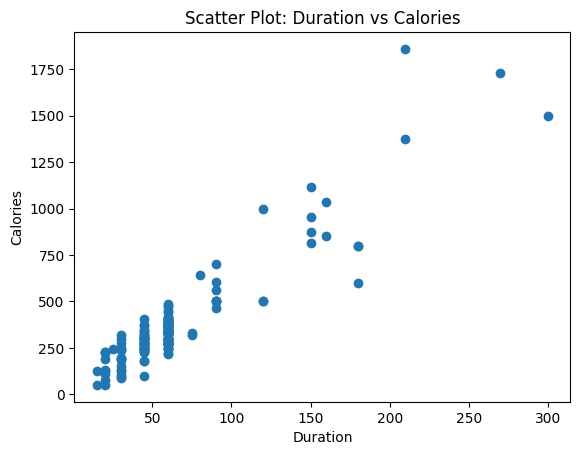

In [9]:
import pandas as pd
data = pd.read_csv('/content/drive/MyDrive/CSV/data.csv')
description = data.describe()
print(description)
null_values = data.isnull().sum()
print("Null Values:")
print(null_values)
data.fillna(data.mean(), inplace=True)
agg_columns = ['Duration', 'Calories']
agg_functions = {
    'Duration': ['min', 'max', 'count', 'mean'],
    'Calories': ['min', 'max', 'count', 'mean']
}
aggregated_data = data[agg_columns].agg(agg_functions)
print("Aggregated Data:")
print(aggregated_data)
filtered_data1 = data[(data['Calories'] >= 500) & (data['Calories'] <= 1000)]
filtered_data2 = data[(data['Calories'] > 500) & (data['Pulse'] < 100)]
df_modified = data.drop(columns=['Maxpulse'])
data.drop(columns=['Maxpulse'], inplace=True)
data['Calories'] = data['Calories'].astype(int)
import matplotlib.pyplot as plt
plt.scatter(data['Duration'], data['Calories'])
plt.xlabel('Duration')
plt.ylabel('Calories')
plt.title('Scatter Plot: Duration vs Calories')
plt.show()

Mean Squared Error: 21026037.329511296


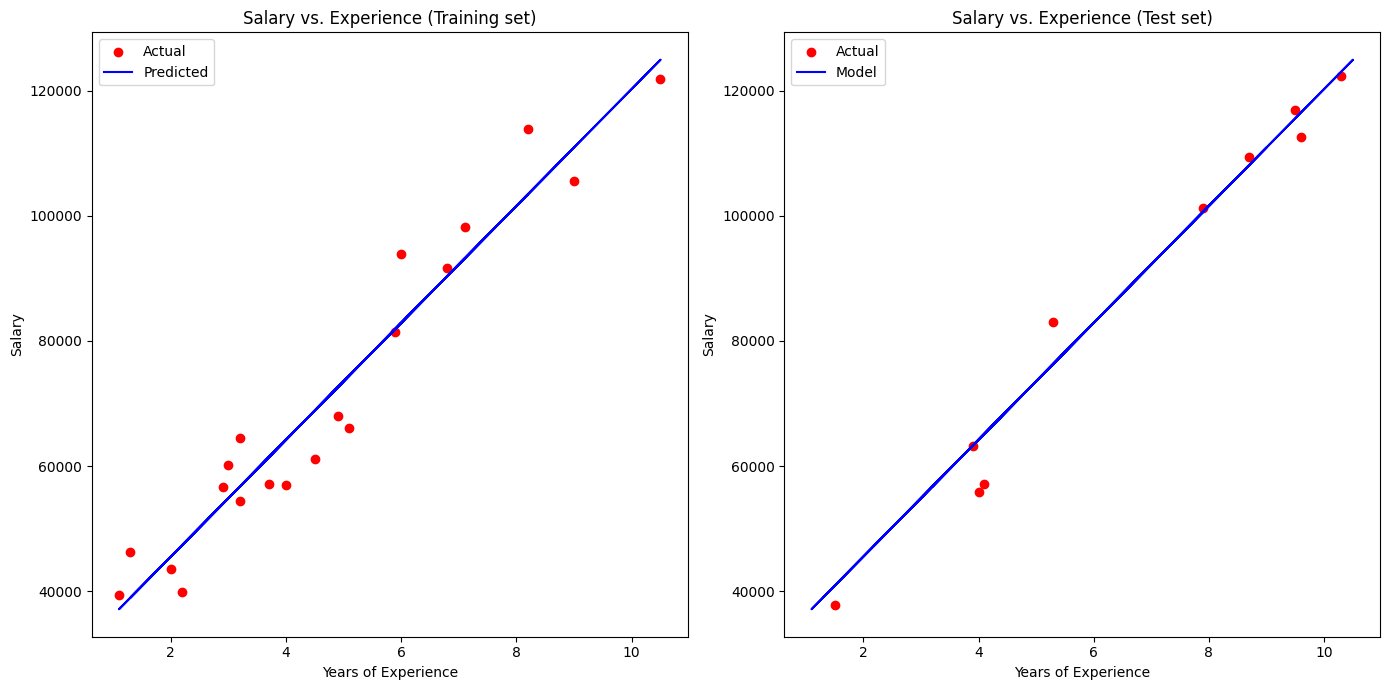

In [10]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

# Upload the dataset
salary_data = pd.read_csv('/content/drive/MyDrive/CSV/Salary_Data (2) (1).csv')

# Dividing the dataset into training and testing sets (1/3 for testing)
X = salary_data.iloc[:, :-1].values  # Features (Years of Experience)
y = salary_data.iloc[:, -1].values   # Target (Salary)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=1/3, random_state=0)

# Fitting the Linear Regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Generating predictions for the test set
y_pred = model.predict(X_test)

# Calculating the Mean Squared Error
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error: {mse}")

# Visualizing the Training set results
plt.figure(figsize=(14, 7))

plt.subplot(1, 2, 1)
plt.scatter(X_train, y_train, color='red', label='Actual')
plt.plot(X_train, model.predict(X_train), color='blue', label='Predicted')
plt.title('Salary vs. Experience (Training set)')
plt.xlabel('Years of Experience')
plt.ylabel('Salary')
plt.legend()

# Visualizing the Test set results
plt.subplot(1, 2, 2)
plt.scatter(X_test, y_test, color='red', label='Actual')
plt.plot(X_train, model.predict(X_train), color='blue', label='Model')
plt.title('Salary vs. Experience (Test set)')
plt.xlabel('Years of Experience')
plt.ylabel('Salary')
plt.legend()

plt.tight_layout()
plt.show()
